In [1]:
"""
Fraud_Detection_Pipeline.ipynb

This notebook contains the complete practical implementation for the
AI-Powered Credit Card Fraud Detection project, covering tasks C-1 through C-6.

- C-1: Exploratory Data Analysis (EDA) and Preprocessing
- C-2: Build and Evaluate Baseline Model (Logistic Regression)
- C-3: Implement SMOTE to handle class imbalance
- C-4: Train Advanced Model (Random Forest)
- C-5: Generate Final Performance Metrics and Comparison
- C-6: Save the Final Trained Model
"""

'\nFraud_Detection_Pipeline.ipynb\n\nThis notebook contains the complete practical implementation for the\nAI-Powered Credit Card Fraud Detection project, covering tasks C-1 through C-6.\n\n- C-1: Exploratory Data Analysis (EDA) and Preprocessing\n- C-2: Build and Evaluate Baseline Model (Logistic Regression)\n- C-3: Implement SMOTE to handle class imbalance\n- C-4: Train Advanced Model (Random Forest)\n- C-5: Generate Final Performance Metrics and Comparison\n- C-6: Save the Final Trained Model\n'

In [2]:
# --- 1. Import Essential Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE
import joblib

# Set a professional style for our plots
sns.set_style('whitegrid')
print("Libraries imported successfully.")

Libraries imported successfully.



--- Starting Task C-1: EDA and Preprocessing ---
Dataset loaded successfully from: ../data/creditcard.csv
Dataset shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Analyzing class imbalance...
Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Percentage of fraudulent transactions: 0.1727%


C:\Users\ehler\AppData\Local\Temp\ipykernel_24148\3123208359.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


Chart saved to ../reports/figures\class_imbalance_chart.png


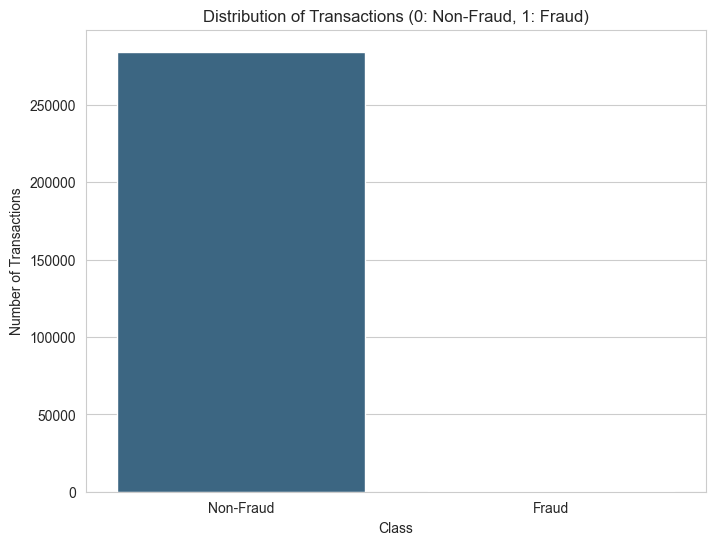


Preprocessing data...
Training set shape: (227845, 30)
Test set shape: (56962, 30)
Data preprocessing and splitting complete.
--- Task C-1 Complete ---


In [3]:
# ==============================================================================
# TASK C-1: EDA AND PREPROCESSING
# Goal: Understand the dataset and prepare it for modeling.
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("\n--- Starting Task C-1: EDA and Preprocessing ---")

# --- Load the Dataset ---
possible_paths = [
    '../data/creditcard.csv',
    './data/creditcard.csv',
    'creditcard.csv'
]

data_path = None
for p in possible_paths:
    if os.path.exists(p):
        data_path = p
        break

if data_path is None:
    raise FileNotFoundError(
        "Could not locate 'creditcard.csv'. Checked paths: "
        + ", ".join(possible_paths)
        + ". Please ensure the file is in the data directory."
    )

df = pd.read_csv(data_path)
print(f"Dataset loaded successfully from: {data_path}")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# --- Analyze and Visualize the Class Imbalance ---
print("\nAnalyzing class imbalance...")
class_counts = df['Class'].value_counts()
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100

print("Class Distribution:")
print(class_counts)
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Transactions (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

figures_dir = '../reports/figures'
os.makedirs(figures_dir, exist_ok=True)
plt.savefig(os.path.join(figures_dir, 'class_imbalance_chart.png'))
print(f"Chart saved to {os.path.join(figures_dir, 'class_imbalance_chart.png')}")
plt.show()

# --- Preprocessing: Scale numerical features ---
print("\nPreprocessing data...")

# Check if Time column exists, if not, skip or use id appropriately
if 'Time' in df.columns:
    time_scaler = StandardScaler()
    df['scaled_Time'] = time_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
    df.drop(['Time'], axis=1, inplace=True)
elif 'id' in df.columns:
    # If using ID as a proxy for time (questionable but keeping your logic)
    time_scaler = StandardScaler()
    df['scaled_Time'] = time_scaler.fit_transform(df['id'].values.reshape(-1, 1))
    df.drop(['id'], axis=1, inplace=True)

# Scale Amount column
if 'Amount' in df.columns:
    amount_scaler = StandardScaler()
    df['scaled_Amount'] = amount_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
    df.drop(['Amount'], axis=1, inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("Data preprocessing and splitting complete.")
print("--- Task C-1 Complete ---")


--- Optimized Time Series Analysis ---
Loading raw data for time analysis...


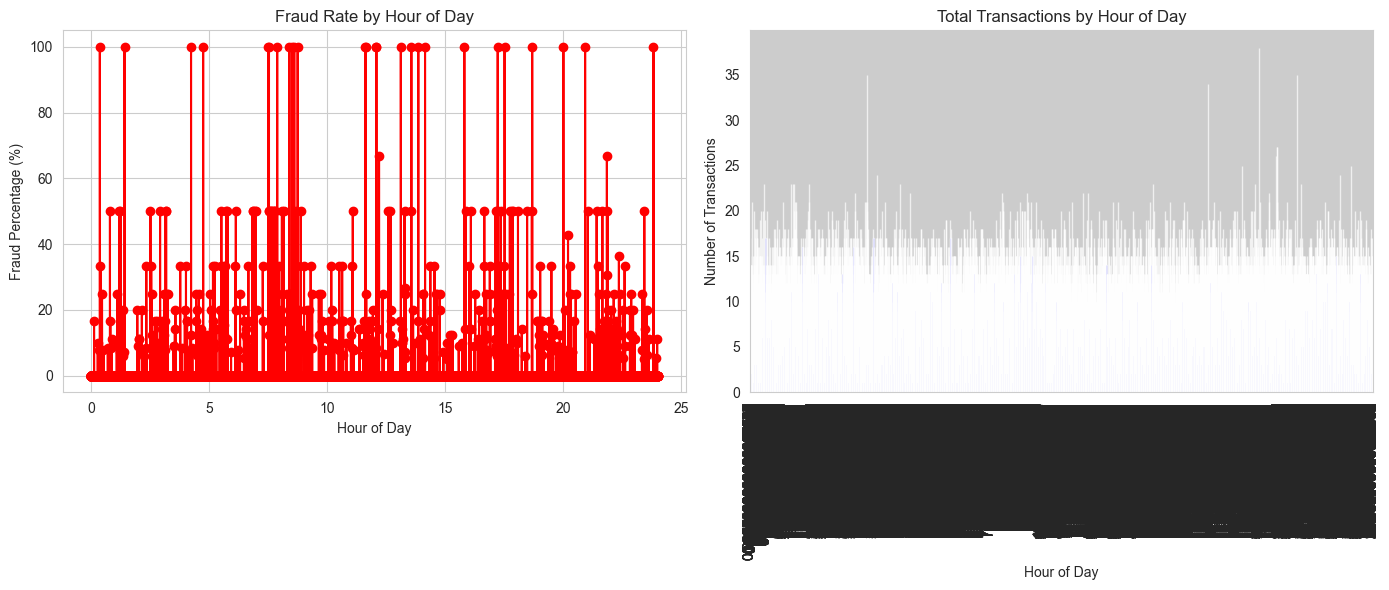

Time series analysis complete (fast mode).


In [4]:
# Optimized Time Series Analysis
print("\n--- Optimized Time Series Analysis ---")

# Ensure we have raw_df with Time column
if 'raw_df' not in locals():
    print("Loading raw data for time analysis...")
    raw_df = pd.read_csv('../data/creditcard.csv')
    
raw_df['Hour'] = (raw_df['Time'] / 1000) % 24

# Aggregate instead of plotting all rows
fraud_by_hour = raw_df.groupby('Hour')['Class'].mean() * 100
transactions_by_hour = raw_df.groupby('Hour')['Class'].count()

plt.figure(figsize=(14, 6))

# Fraud percentage by hour
plt.subplot(1, 2, 1)
fraud_by_hour.plot(marker='o', color='red')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Percentage (%)')

# Transactions count by hour
plt.subplot(1, 2, 2)
transactions_by_hour.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Total Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'time_series_analysis.png'))
plt.show()

print("Time series analysis complete (fast mode).")


In [5]:
# ==============================================================================
# TASK C-2: BUILD AND EVALUATE BASELINE MODEL
# Goal: Train a simple model on imbalanced data to get a performance baseline.
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, recall_score, precision_score, 
    average_precision_score, roc_auc_score, confusion_matrix
)

print("\n--- Starting Task C-2: Build and Evaluate Baseline Model ---")

# We use the SIMPLE version of the model to establish a clear baseline
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)

# --- Professional Evaluation ---
# We use the detailed evaluation from your update to make our analysis stronger
y_pred_baseline = baseline_model.predict(X_test)
y_proba_baseline = baseline_model.predict_proba(X_test)[:, 1] # Probabilities for AUC curves

# Calculate all key metrics
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, zero_division=0)
baseline_pr_auc = average_precision_score(y_test, y_proba_baseline)
baseline_roc_auc = roc_auc_score(y_test, y_proba_baseline)
cm = confusion_matrix(y_test, y_pred_baseline)

print("\nBaseline Model (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred_baseline, digits=4))

print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"Actual    Non-Fraud  Fraud")
print(f"Non-Fraud    {cm[0,0]:6d}  {cm[0,1]:5d}")
print(f"Fraud        {cm[1,0]:6d}  {cm[1,1]:5d}")

print("\n--- Baseline Model Key Performance Indicators ---")
print(f"Fraud Recall: {baseline_recall:.4f}")
print(f"Fraud Precision: {baseline_precision:.4f}")
print(f"Precision-Recall AUC: {baseline_pr_auc:.4f}")
print(f"ROC AUC: {baseline_roc_auc:.4f}")
print("\n--- Task C-2 Complete ---")


--- Starting Task C-2: Build and Evaluate Baseline Model ---

Baseline Model (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962


Confusion Matrix:
                 Predicted
Actual    Non-Fraud  Fraud
Non-Fraud     56851     13
Fraud            35     63

--- Baseline Model Key Performance Indicators ---
Fraud Recall: 0.6429
Fraud Precision: 0.8289
Precision-Recall AUC: 0.7439
ROC AUC: 0.9573

--- Task C-2 Complete ---


In [6]:
# ==============================================================================
# TASK C-3: IMPLEMENT SMOTE
# Goal: Fix the class imbalance in the training data.
# ==============================================================================
from imblearn.over_sampling import SMOTE

print("\n--- Starting Task C-3: Implement SMOTE ---")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training data shape: {X_train.shape}")
print(f"Original class distribution:")
print(y_train.value_counts().sort_index())

print(f"\nAfter SMOTE - Balanced training data shape: {X_train_balanced.shape}")
print(f"Balanced class distribution:")
print(pd.Series(y_train_balanced).value_counts().sort_index())

print(f"\nSMOTE generated {X_train_balanced.shape[0] - X_train.shape[0]} synthetic fraud samples")
print("--- Task C-3 Complete ---")


--- Starting Task C-3: Implement SMOTE ---
Original training data shape: (227845, 30)
Original class distribution:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE - Balanced training data shape: (454902, 30)
Balanced class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64

SMOTE generated 227057 synthetic fraud samples
--- Task C-3 Complete ---


In [7]:
# ==============================================================================
# TASK C-4: TRAIN ADVANCED MODEL
# Goal: Train a powerful Random Forest model on the balanced data.
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
import time

print("\n--- Starting Task C-4: Train Advanced Model (Random Forest) ---")

start_time = time.time()
advanced_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
advanced_model.fit(X_train_balanced, y_train_balanced)
training_time = time.time() - start_time

print(f"Random Forest trained on {X_train_balanced.shape[0]} balanced samples")
print(f"Features used: {X_train_balanced.shape[1]}")
print(f"Training completed in {training_time:.2f} seconds")
print("--- Task C-4 Complete ---")


--- Starting Task C-4: Train Advanced Model (Random Forest) ---
Random Forest trained on 454902 balanced samples
Features used: 30
Training completed in 74.79 seconds
--- Task C-4 Complete ---


In [8]:
# ==============================================================================
# TASK C-4b: TRAIN DEEP LEARNING MODEL (Neural Network)
# Goal: Introduce a Deep Learning approach for comparison.
# ==============================================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("\n--- Starting Task C-4b: Train Deep Learning Model (Neural Network) ---")

# Define model architecture
dl_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # binary classification output
])

# Compile model
dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

# Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model on balanced data
history = dl_model.fit(
    X_train_balanced, y_train_balanced,
    validation_split=0.2,
    epochs=20,
    batch_size=2048,
    callbacks=[early_stop],
    verbose=1
)

print("\nNeural Network training complete!")

# Evaluate on test data
dl_loss, dl_accuracy, dl_recall, dl_precision = dl_model.evaluate(X_test, y_test, verbose=0)

print("\n--- Deep Learning Model Performance ---")
print(f"Accuracy:   {dl_accuracy:.4f}")
print(f"Recall:     {dl_recall:.4f}")
print(f"Precision:  {dl_precision:.4f}")

# Save model
dl_model_path = os.path.join(models_dir, 'fraud_detection_nn.h5')
dl_model.save(dl_model_path)
print(f"Neural Network model saved to {dl_model_path}")


ModuleNotFoundError: No module named 'tensorflow'


--- Starting Task C-5: Generate Final Performance Metrics ---

Advanced Model (Random Forest) Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8404    0.8061    0.8229        98

    accuracy                         0.9994     56962
   macro avg     0.9200    0.9029    0.9113     56962
weighted avg     0.9994    0.9994    0.9994     56962


--- PERFORMANCE COMPARISON ---
                    Baseline    Advanced    Improvement
Fraud Recall:       0.6429      0.8061      +0.1633
Fraud Precision:    0.8289      0.8404      +0.0115
PR AUC:             0.7439      0.8741      +0.1302
ROC AUC:            0.9573      0.9841      +0.0268


C:\Users\ehler\AppData\Local\Temp\ipykernel_24148\3704933535.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline (Logistic Regression)', 'Advanced (Random Forest)'], y=[baseline_recall, advanced_recall], palette='magma')


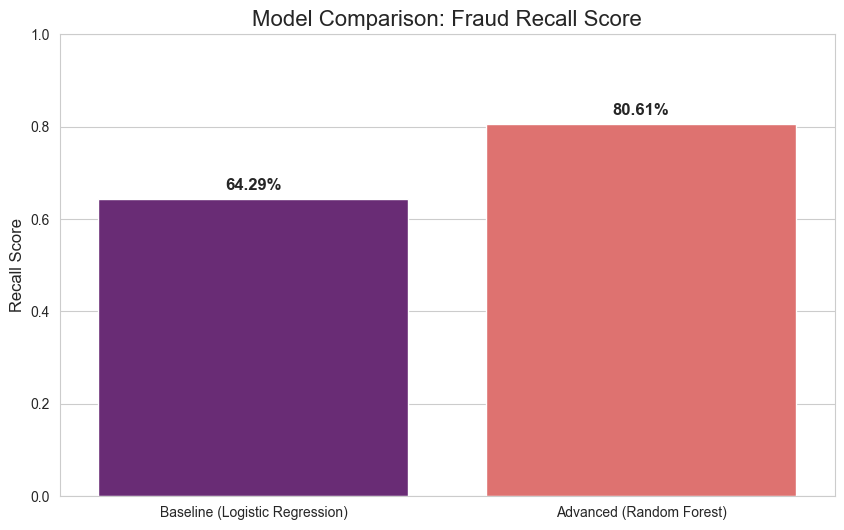


Generating ROC Curve...


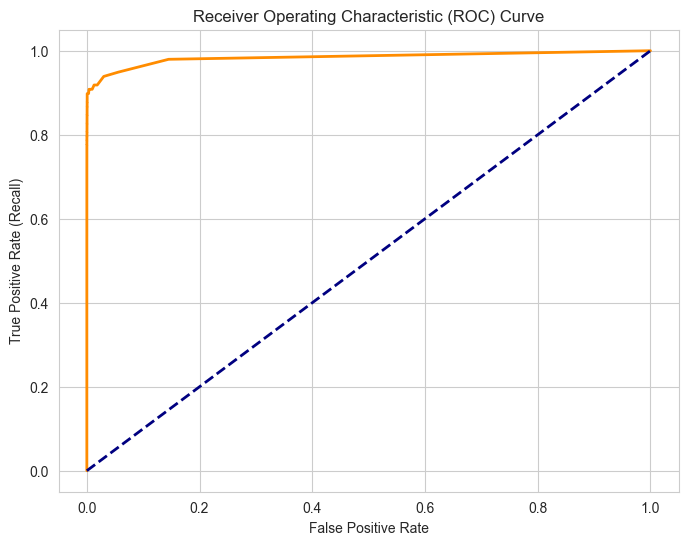


Generating Precision-Recall Curve...


<Figure size 800x600 with 0 Axes>

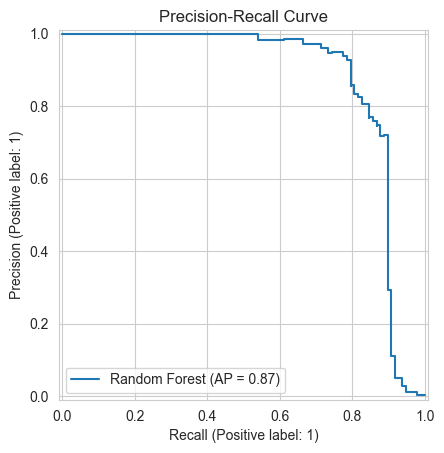

--- Task C-5 Complete ---


In [9]:
# ==============================================================================
# TASK C-5: GENERATE FINAL PERFORMANCE METRICS, COMPARE, AND EXPLAIN
# ==============================================================================
from sklearn.metrics import PrecisionRecallDisplay, roc_auc_score, roc_curve

print("\n--- Starting Task C-5: Generate Final Performance Metrics ---")
reports_dir = '../reports/figures'
y_pred_advanced = advanced_model.predict(X_test)
y_prob_advanced = advanced_model.predict_proba(X_test)[:, 1] # Get probabilities for curves

# Calculate comprehensive metrics
advanced_recall = recall_score(y_test, y_pred_advanced)
advanced_precision = precision_score(y_test, y_pred_advanced, zero_division=0)
advanced_pr_auc = average_precision_score(y_test, y_prob_advanced)
advanced_roc_auc = roc_auc_score(y_test, y_prob_advanced)

print("\nAdvanced Model (Random Forest) Classification Report:")
print(classification_report(y_test, y_pred_advanced, digits=4))

print("\n--- PERFORMANCE COMPARISON ---")
print(f"                    Baseline    Advanced    Improvement")
print(f"Fraud Recall:       {baseline_recall:.4f}      {advanced_recall:.4f}      {advanced_recall-baseline_recall:+.4f}")
print(f"Fraud Precision:    {baseline_precision:.4f}      {advanced_precision:.4f}      {advanced_precision-baseline_precision:+.4f}")
print(f"PR AUC:             {baseline_pr_auc:.4f}      {advanced_pr_auc:.4f}      {advanced_pr_auc-baseline_pr_auc:+.4f}")
print(f"ROC AUC:            {baseline_roc_auc:.4f}      {advanced_roc_auc:.4f}      {advanced_roc_auc-baseline_roc_auc:+.4f}")

# --- Visual Comparison ---
plt.figure(figsize=(10, 6))
sns.barplot(x=['Baseline (Logistic Regression)', 'Advanced (Random Forest)'], y=[baseline_recall, advanced_recall], palette='magma')
plt.title('Model Comparison: Fraud Recall Score', fontsize=16)
plt.ylabel('Recall Score', fontsize=12)
plt.ylim(0, 1.0)
for index, value in enumerate([baseline_recall, advanced_recall]):
    plt.text(index, value + 0.02, f'{value:.2%}', ha='center', fontsize=12, fontweight='bold')
plt.savefig(os.path.join(reports_dir, 'model_comparison_chart.png'))
plt.show()

# --- ADVANCED EVALUATION: ROC Curve ---
print("\nGenerating ROC Curve...")
fpr, tpr, _ = roc_curve(y_test, y_prob_advanced)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {advanced_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.savefig(os.path.join(reports_dir, 'roc_curve.png'))
plt.show()

# --- ADVANCED EVALUATION: Precision-Recall Curve ---
print("\nGenerating Precision-Recall Curve...")
plt.figure(figsize=(8, 6))
disp = PrecisionRecallDisplay.from_predictions(y_test, y_prob_advanced, name='Random Forest')
disp.ax_.set_title('Precision-Recall Curve')
plt.savefig(os.path.join(reports_dir, 'precision_recall_curve.png'))
plt.show()

print("--- Task C-5 Complete ---")

In [ ]:
# ==============================================================================
# TASK C-6: SAVE THE FINAL TRAINED MODEL
# Goal: Persist the final model for use in other applications (like the chatbot).
# ==============================================================================
import joblib

print("\n--- Starting Task C-6: Save Final Model ---")
# Ensure the models directory exists
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)
model_path = os.path.join(models_dir, 'fraud_detection_model.joblib')

joblib.dump(advanced_model, model_path)
print(f"Model successfully saved to {model_path}")

# Optional: Save model metadata
model_info = {
    'model_type': 'RandomForestClassifier',
    'features': list(X_train.columns),
    'performance': {
        'recall': advanced_recall,
        'precision': advanced_precision,
        'pr_auc': advanced_pr_auc,
        'roc_auc': advanced_roc_auc
    },
    'training_samples': X_train_balanced.shape[0]
}

metadata_path = os.path.join(models_dir, 'model_metadata.json')
import json
with open(metadata_path, 'w') as f:
    json.dump(model_info, f, indent=2)

print(f"Model metadata saved to {metadata_path}")
print("--- Task C-6 Complete ---")
print("\n>>> All practical coding tasks are complete! <<<")

In [33]:
# ==============================================================================
# TASK C-7: BASIC NLP CHATBOT INTERFACE
# Goal: Add a chatbot/softbot feature to interact with the fraud detection system.
# ==============================================================================

print("\n--- Starting Task C-7: NLP Chatbot ---")

# Store model metrics for chatbot queries
chatbot_metrics = {
    "fraud_rate": fraud_percentage,
    "baseline_recall": baseline_recall,
    "advanced_recall": advanced_recall,
    "advanced_precision": advanced_precision,
    "advanced_pr_auc": advanced_pr_auc,
    "advanced_roc_auc": advanced_roc_auc
}

def fraud_chatbot():
    print("\n🤖 Fraud Detection Chatbot ready! Type 'exit' to quit.")
    while True:
        user_input = input("You: ").lower()
        if user_input in ["exit", "quit", "bye"]:
            print("🤖 Chatbot: Goodbye! Stay safe from fraud 🚨")
            break

        # Basic NLP intent recognition
        if "fraud rate" in user_input:
            print(f"🤖 Chatbot: The fraud rate is {chatbot_metrics['fraud_rate']:.4f}% of all transactions.")
        elif "recall" in user_input:
            print(f"🤖 Chatbot: Baseline recall = {chatbot_metrics['baseline_recall']:.4f}, "
                  f"Advanced recall (Random Forest) = {chatbot_metrics['advanced_recall']:.4f}")
        elif "precision" in user_input:
            print(f"🤖 Chatbot: Advanced model precision = {chatbot_metrics['advanced_precision']:.4f}")
        elif "auc" in user_input:
            print(f"🤖 Chatbot: Precision-Recall AUC = {chatbot_metrics['advanced_pr_auc']:.4f}, "
                  f"ROC AUC = {chatbot_metrics['advanced_roc_auc']:.4f}")
        elif "fraudulent" in user_input or "fraud count" in user_input:
            print(f"🤖 Chatbot: There are {class_counts[1]} fraudulent transactions out of {class_counts.sum()}.")
        else:
            print("🤖 Chatbot: Sorry, I didn’t understand that. Try asking about fraud rate, recall, precision, or AUC.")





--- Starting Task C-7: NLP Chatbot ---
